<a href="https://colab.research.google.com/github/ilmechaJu/Kaggle/blob/main/bike_sharing_demand_(%EC%8B%A4%EC%8A%B5)%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand

## 데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 자전거 대여량을 예측하기

이번 캐글 경진대회는 시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요. 이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

## 컬럼 설명

[데이터셋 다운로드링크](https://www.kaggle.com/c/bike-sharing-demand/data)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **season** - 계절. 봄(1), 여름(2), 가을(3), 겨울(4) 순으로 표현합니다.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **weather** - 날씨. 1 ~ 4 사이의 값을 가지며, 구체적으로는 다음과 같습니다.
    * 1: 아주 깨끗한 날씨입니다. 또는 아주 약간의 구름이 끼어있습니다.
    * 2: 약간의 안개와 구름이 끼어있는 날씨입니다.
    * 3: 약간의 눈, 비가 오거나 천둥이 칩니다.
    * 4: 아주 많은 비가 오거나 우박이 내립니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **atemp** - 체감 온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **humidity** - 습도.
  * **windspeed** - 풍속.
  * **casual** - 비회원(non-registered)의 자전거 대여량.
  * **registered** - 회원(registered)의 자전거 대여량.
  * **count** - 총 자전거 대여랑. 비회원(casual) + 회원(registered)과 동일합니다.
  
## 프로젝트 구성
* 데이터 로드 (load data)
* 데이터 개요
* 데이터 전처리 (pre-processing)
* 모델 생성
* 검증
* 예측
* Kaggle 제출 및 점수확인

## 모듈 import 

필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [ ]:
# 캐글로 csv업로드 하는 이 코드 출처
# https://www.youtube.com/watch?v=m-As6o-SLtI
# 폴더명이 다른지 제대로 실행이 안됨.

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json/ ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/kaggle.json/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle competitions list

In [ ]:
!kaggle competitions submit -c bike sharing demand -f /content/sampleSubmission.csv -m Test_ilmechaju_1

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

%matplotlib inline

# Data 경로 설정
DATA_DIR = ''

## 데이터 로드

**Kaggle 데이터 분석 대회**에서는 일반적으로 2개의 데이터 셋트를 나누어 제공합니다.

1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

In [ ]:
# train 데이터셋 로드 (train.csv)
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
# test 데이터셋 로드 (test.csv)
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv')) 

## 데이터 개요 확인

로드한 DataFrame의 가장 기본적인 데이터 구조 및 결측치를 확인합니다.

In [ ]:
# train 앞 부분 5개 행 출력
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# test 앞 부분 5개 행 출력
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# train, test 의 shape 확인.
train.shape, test.shape #train은 10886개, 12컬럼.   #test는 6493개, 9컬럼.

((10886, 12), (6493, 9))

In [ ]:
# train column 별 데이터 개수, 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
# test column 별 데이터 개수, 타입 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
# train 결측치 확인  #결측치가 모두 0 이다.
train.isnull().sum() 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# test 결측치 확인
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# datetime 컬럼 변환
# datetime64 타입으로 변환
# train 데이터셋 
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train['datetime'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


0        52
1        52
2        52
3        52
4        52
         ..
10881    51
10882    51
10883    51
10884    51
10885    51
Name: datetime, Length: 10886, dtype: int64

In [ ]:
# 연도(year), 월(month), 일(day), 요일(dayofweek), 분기(quarter), 시(hour), 분(minute), 초(second) 컬럼 생성
# 생성된 컬럼에 datetime 컬럼으로부터 정보를 추출하여 대입
# train 데이터셋 
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek
train['quarter'] = train['datetime'].dt.quarter
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [ ]:
# 연도(year), 월(month), 일(day), 요일(dayofweek), 분기(quarter), 시(hour), 분(minute), 초(second) 컬럼 상위 5개 행 출력
# train
train[['year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute', 'second']].head()

,year,month,day,dayofweek,quarter,hour,minute,second
0,2011,1,1,5,1,0,0,0
1,2011,1,1,5,1,1,0,0
2,2011,1,1,5,1,2,0,0
3,2011,1,1,5,1,3,0,0
4,2011,1,1,5,1,4,0,0


In [ ]:
# datetime 컬럼 변환
# datetime64 타입으로 변환
# test 데이터셋 
test['datetime'] = pd.to_datetime(test['datetime'])

In [ ]:
# 연도(year), 월(month), 일(day), 요일(dayofweek), 분기(quarter), 시(hour), 분(minute), 초(second) 컬럼 생성
# 생성된 컬럼에 datetime 컬럼으로부터 정보를 추출하여 대입
# test
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek
test['quarter'] = test['datetime'].dt.quarter
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

In [ ]:
# 연도(year), 월(month), 일(day), 요일(dayofweek), 분기(quarter), 시(hour), 분(minute), 초(second) 컬럼 상위 5개 행 출력
# test 데이터셋 
test[['year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute', 'second']].head()

,year,month,day,dayofweek,quarter,hour,minute,second
0,2011,1,20,3,1,0,0,0
1,2011,1,20,3,1,1,0,0
2,2011,1,20,3,1,2,0,0
3,2011,1,20,3,1,3,0,0
4,2011,1,20,3,1,4,0,0


In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,4,0,0


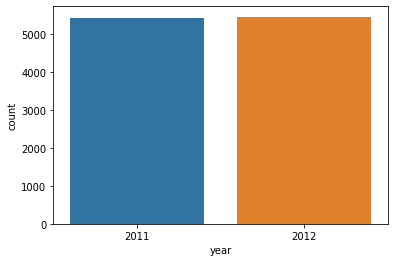

In [ ]:
# 연도(year)별 데이터셋 개수 시각화(countplot)
sns.countplot(x='year', data=train)
plt.show()

In [ ]:
# 월별(month)별 평균 온도(temp)
# train 데이터셋
pd.DataFrame(train.groupby('month')['temp'].mean())

,temp
month,
1,9.840000
2,11.798535
3,15.902175
4,18.718372
5,22.674079
6,27.064496
7,30.841711
8,29.736689
9,25.779032


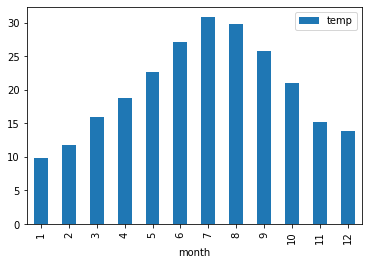

In [ ]:
# 월별(month)별 평균 온도(temp) 시각화(bar-dataframe)
# train 데이터셋
pd.DataFrame(train.groupby('month')['temp'].mean()).plot(kind='bar')
plt.show()

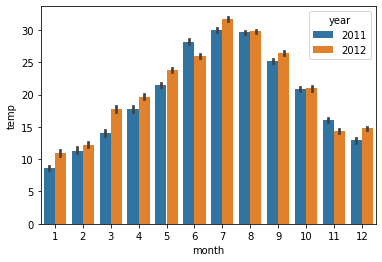

In [ ]:
# 월별(month)별 / 연도(year)별 평균 온도(temp) 시각화(barplot-seaborn)
# train 데이터셋
sns.barplot(x='month', y='temp', hue='year', data=train)
plt.show()

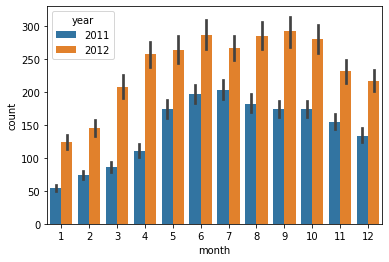

In [ ]:
# 월별(month)별 / 연도(year)별 평균 대여량(count) 시각화(barplot-seaborn)
# train 데이터셋
sns.barplot(x='month', y='count', hue='year', data=train)
plt.show()

In [ ]:
# 분기별 데이터 분포 확인
# train 데이터셋
train['quarter'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: quarter, dtype: int64

In [ ]:
# 시간(hour)별 데이터 분포 확인
# train 데이터셋
train['hour'].value_counts()

23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [ ]:
# 분(minute)별 데이터 분포 확인
# train 데이터셋
train['minute'].value_counts()

0    10886
Name: minute, dtype: int64

In [ ]:
# 초(second)별 데이터 분포 확인
# train 데이터셋
train['second'].value_counts()

0    10886
Name: second, dtype: int64

분(minute)과 초(second)는 단일 값으로 분포하고 있음을 확인한다.

단일 값으로 구성되어 있는 경우, 머신러닝 예측에 도움이 되지 않으므로 (모든 값이 동일) 제거한다

In [ ]:
# minute, second 컬럼 제거
# 제거 후 상위 5개 행 출력
# train 데이터셋
train = train.drop(['minute', 'second'], axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,1,4


In [ ]:
# minute, second 컬럼 제거
# 제거 후 상위 5개 행 출력
# test 데이터셋
test = test.drop(['minute', 'second'], axis=1)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,quarter,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,1,4


In [ ]:
# weekend 컬럼을 생성(주말)
# 주말인 경우 1, 주중인 경우 0
# 요일(dayofweek)을 참고한다. dayofweek 0: 월요일, 6: 일요일
# weekend 컬럼 상위 5개 출력
# train 데이터셋
train['weekend'] = train['dayofweek'].apply(lambda x: int(x in [5, 6]))
train['weekend'].head()

0    1
1    1
2    1
3    1
4    1
Name: weekend, dtype: int64

In [ ]:
# weekend 컬럼을 생성(주말)
# 주말인 경우 1, 주중인 경우 0
# 요일(dayofweek)을 참고한다. dayofweek 0: 월요일, 6: 일요일
# weekend 컬럼 상위 5개 출력
# test 데이터셋
test['weekend'] = test['dayofweek'].apply(lambda x: int(x in [5, 6]))
test['weekend'].head()

0    0
1    0
2    0
3    0
4    0
Name: weekend, dtype: int64

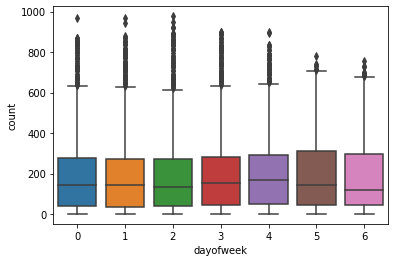

In [ ]:
# 요일별 자전거 데이터 시각화(boxplot)
# y컬럼: count
# train 데이터셋
sns.boxplot(x='dayofweek', y='count',data=train)
plt.show()

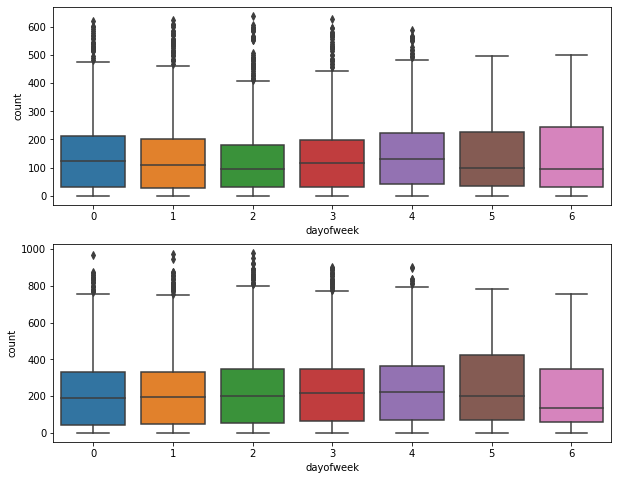

In [ ]:
# 2011년 / 2012 요일별 자전거 데이터 시각화(boxplot)
# y컬럼: count
# figure 사이즈는 (10, 8). 힌트) fig.set_size_inches(10, 8)
# train 데이터셋
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(10, 8)
sns.boxplot(x='dayofweek', y='count',data=train.loc[train['year']==2011], ax=axes[0])
sns.boxplot(x='dayofweek', y='count',data=train.loc[train['year']==2012], ax=axes[1])
plt.show()

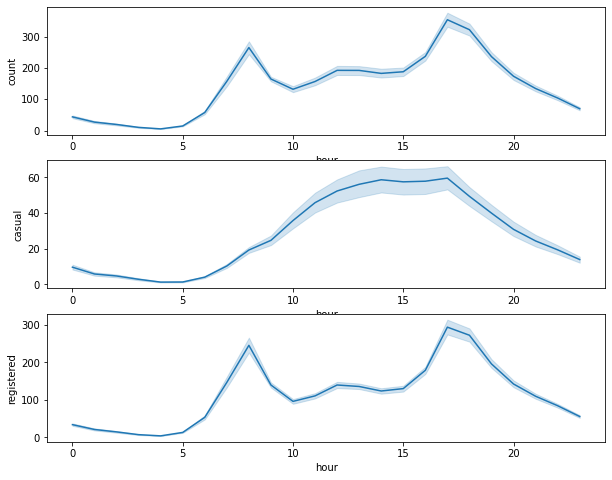

In [ ]:
# 2011년 요일별 자전거 데이터 시각화(pointplot)
# y컬럼: count, casual, registered
# figure 사이즈는 (10, 8). 힌트) fig.set_size_inches(10, 8)
# train 데이터셋
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(10, 8)
sns.lineplot(x='hour', y='count', data=train.loc[train['year']==2011], ax=axes[0])
sns.lineplot(x='hour', y='casual',data=train.loc[train['year']==2011], ax=axes[1])
sns.lineplot(x='hour', y='registered',data=train.loc[train['year']==2011], ax=axes[2])
plt.show()

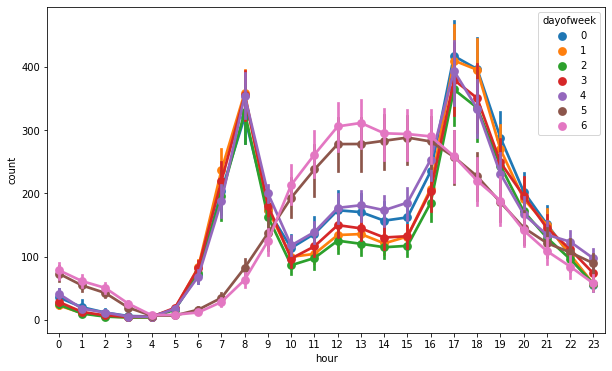

In [ ]:
# 2011년 요일별 자전거 데이터 시각화(pointplot)
# y컬럼: count, casual, registered
# train 데이터셋
plt.figure(figsize=(10, 6))
sns.pointplot(x='hour', y='count', hue='dayofweek', data=train.loc[train['year']==2011])
plt.show()

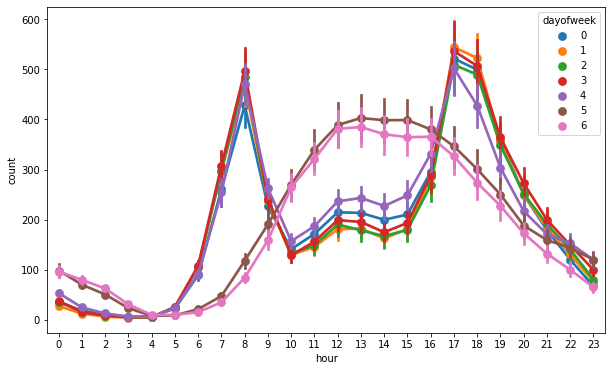

In [ ]:
# 전체 요일별 자전거 데이터 시각화(pointplot)
# y컬럼: count
# train 데이터셋
plt.figure(figsize=(10, 6))
sns.pointplot(x='hour', y='count', hue='dayofweek', data=train)
plt.show()

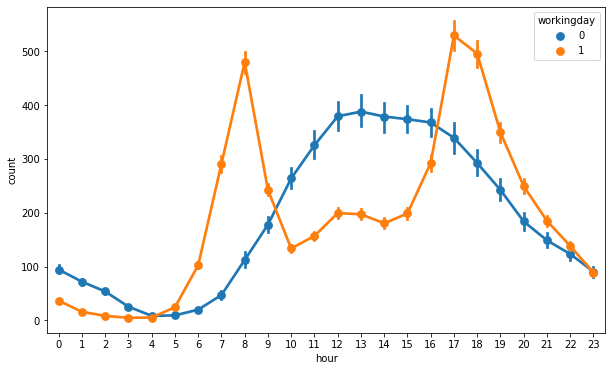

In [ ]:
# 전체 workingday별 자전거 데이터 시각화(pointplot)
# y컬럼: count
# train 데이터셋
plt.figure(figsize=(10, 6))
sns.pointplot(x='hour', y='count', hue='workingday', data=train)
plt.show()

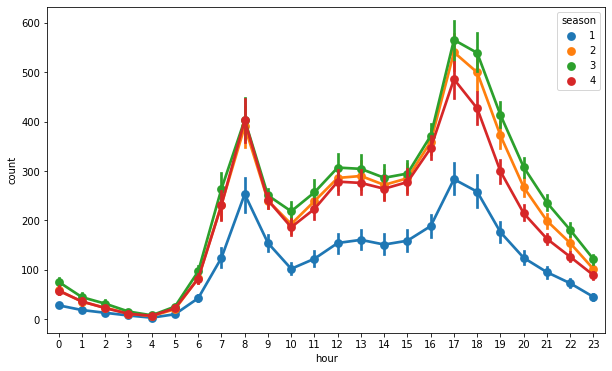

In [ ]:
# 전체 season별 자전거 데이터 시각화(pointplot)
# y컬럼: count
# train 데이터셋
plt.figure(figsize=(10, 6))
sns.pointplot(x='hour', y='count', hue='season', data=train)
plt.show()

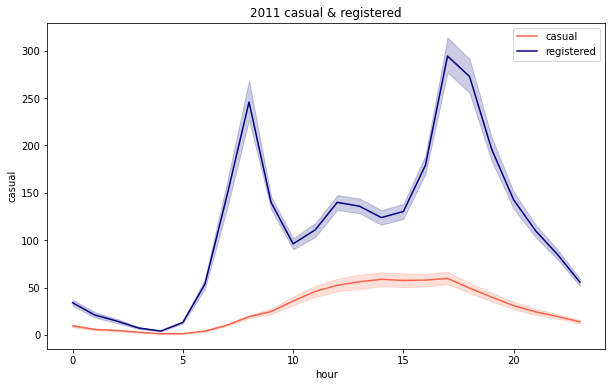

In [ ]:
# 2011년 요일별 자전거 데이터 시각화(lineplot)
# y컬럼: count, casual, registered
# train 데이터셋
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='casual',data=train.loc[train['year']==2011], color='tomato', label='casual')
sns.lineplot(x='hour', y='registered',data=train.loc[train['year']==2011], color='navy', label='registered')
plt.title('2011 casual & registered')
plt.legend()
plt.show()

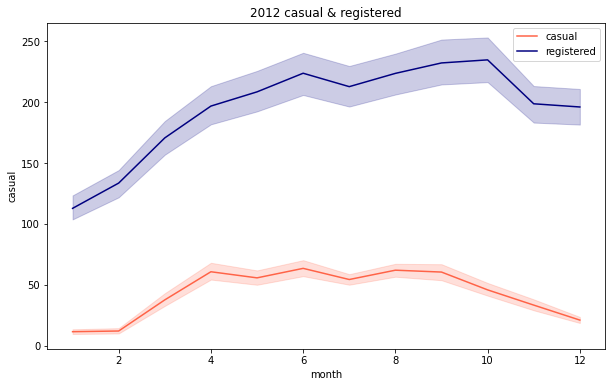

In [ ]:
# 2012년 월(month)별 자전거 데이터 시각화(lineplot)
# y컬럼: count, casual, registered
# train 데이터셋
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='casual',data=train.loc[train['year']==2012], color='tomato', label='casual')
sns.lineplot(x='month', y='registered',data=train.loc[train['year']==2012], color='navy', label='registered')
plt.title('2012 casual & registered')
plt.legend()
plt.show()

In [ ]:
# temp, atemp, weather, count, casual, registered 의 상관관계 출력
# train 데이터셋
train[['temp', 'atemp', 'weather', 'count', 'casual', 'registered']].corr()

,temp,atemp,weather,count,casual,registered
temp,1.000000,0.984948,-0.055035,0.394454,0.467097,0.318571
atemp,0.984948,1.000000,-0.055376,0.389784,0.462067,0.314635
weather,-0.055035,-0.055376,1.000000,-0.128655,-0.135918,-0.109340
count,0.394454,0.389784,-0.128655,1.000000,0.690414,0.970948
casual,0.467097,0.462067,-0.135918,0.690414,1.000000,0.497250
registered,0.318571,0.314635,-0.109340,0.970948,0.497250,1.000000


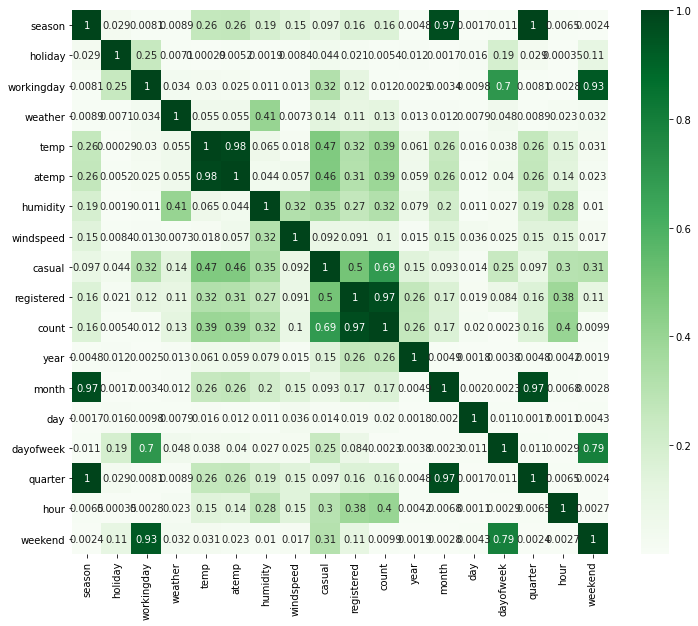

In [ ]:
# train 데이터셋 모든 컬럼에 대한 상관관계 시각화(heatmap)
# annot=True 옵션 적용
# cmap='Greens'
# train 데이터셋
plt.figure(figsize=(12, 10))
sns.heatmap(abs(train.corr()), annot=True, cmap='Greens')
plt.show()

**다중공선성 문제(Multicollinearity)** 는 통계학의 회귀분석에서 **독립변수들 간에 강한 상관관계** 가 나타나는 문제이다. 적절한 회귀분석을 위해 해결해야 하는 문제가 된다.

해결방법)

- 상관관계가 높은 독립변수 중 하나 혹은 일부를 제거
- 변수를 변환

In [ ]:
from sklearn.decomposition import PCA ##본인 유튜브에 PCA 개념 영상 보기(    )

pca = PCA(n_components=1, random_state=123)
train_temp = pca.fit_transform(train[['temp', 'atemp']])
test_temp = pca.transform(test[['temp', 'atemp']])

# 검증코드 (아래 코드는 수정하지 않습니다.)
# Cell을 실행시 에러가 발생하면 안됩니다.
assert train_temp[10].round(3) == 6.063
assert test_temp[10].round(3) == 15.526

In [ ]:
# temp, atemp 컬럼을 제거한 후 'temp_pca' 컬럼을 생성하여 train_temp, test_temp를 대입합니다.
# train, test 데이터셋 모두 적용
train = train.drop(['temp', 'atemp'], axis=1)
test = test.drop(['temp', 'atemp'], axis=1)

train['temp_pca'] = train_temp
test['temp_pca'] = test_temp

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,weekend,temp_pca
0,2011-01-01 00:00:00,1,0,0,1,81,0.0,3,13,16,2011,1,1,5,1,0,1,13.848653
1,2011-01-01 01:00:00,1,0,0,1,80,0.0,8,32,40,2011,1,1,5,1,1,1,14.963061
2,2011-01-01 02:00:00,1,0,0,1,80,0.0,5,27,32,2011,1,1,5,1,2,1,14.963061
3,2011-01-01 03:00:00,1,0,0,1,75,0.0,3,10,13,2011,1,1,5,1,3,1,13.848653
4,2011-01-01 04:00:00,1,0,0,1,75,0.0,0,1,1,2011,1,1,5,1,4,1,13.848653


In [ ]:
# 검증코드 (아래 코드는 수정하지 않습니다.)
# Cell을 실행시 에러가 발생하면 안됩니다.
assert train.shape == (10886, 18)
assert test.shape == (6493, 15)

In [ ]:
# count 컬럼에 대한 상관관계 출력 (내림차순 정렬)
# 상관계수 절대값 (abs)
# train 데이터셋
pd.DataFrame(abs(train.corr())['count'].sort_values(ascending=False))

,count
count,1.000000
registered,0.970948
casual,0.690414
hour,0.400601
temp_pca,0.393394
humidity,0.317371
year,0.260403
month,0.166862
quarter,0.163439
season,0.163439


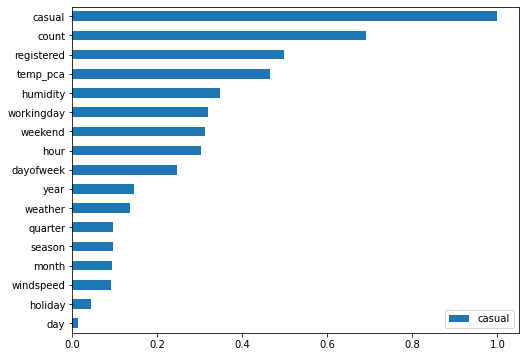

In [ ]:
# casual 컬럼에 대한 상관관계 출력 (dataframe - barh)
# 상관계수 절대값 (abs)
# train 데이터셋
pd.DataFrame(abs(train.corr())['casual'].sort_values(ascending=True)).plot(kind='barh', figsize=(8, 6))
# plt.show()

## Feature(컬럼) 선택

In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'humidity',
       'windspeed', 'year', 'month', 'day', 'dayofweek', 'quarter', 'hour',
       'weekend', 'temp_pca'],
      dtype='object')

분석을 토대로 머신러닝 알고리즘에 입력할 feature(컬럼)를 선택합니다.

In [ ]:
# 본인의 판단에 따라 훈련에 사용할 feature와 사용하지 않을 feature를 선택합니다.
features = [
    # 사용하지 않을 feature는 주석 처리합니다.
    'season', 
    'holiday',
    'workingday', 
    'weather', 
    'humidity', 
#     'windspeed',
    'temp_pca',
    'year', 
    'month', 
#     'day', 
    'dayofweek', 
    'quarter', 
    'hour', 
]

## Label(Y값)

In [ ]:
# count 값을 Y값으로 설정한다.
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

## 훈련(Train) / 검증(Validation) 세트 분할

- random_state=123
- test_size=0.2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# x에는 정의한 train[features], y에는 'count', random_state=123, test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(train[features], train['count'], test_size=0.2, random_state=123)

# 검증코드 (아래 코드는 수정하지 않습니다.)
# Cell을 실행시 에러가 발생하면 안됩니다.
assert x_train.shape[0] == 8708
assert x_test.shape[0] == 2178

## 모델 정의

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# random_state=123
rfc = RandomForestRegressor(random_state=123)
rfc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
# x_test에 대한 예측
# 결과 값은 pred 변수에 저장
pred = rfc.predict(x_test)

## 평가지표 & 검증 (Evaluation)

In [ ]:
# Root Mean Squared Error 구현
# np.log1p를 y_true, y_pred에 취한 후
# mean_squared_error 지표에 루트를 씌운다.
# 힌트) np.sqrt, np.log
from sklearn.metrics import mean_squared_error

def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

# 검증코드 (아래 코드는 수정하지 않습니다.)
# Cell을 실행시 에러가 발생하면 안됩니다.
assert RMSLE(np.array([10]), np.array([11])).round(3) == 0.087

In [ ]:
# y_test와 pred 사이의 RMSLE 결과 확인 
# 평가지표 결과 출력
RMSLE(y_test, pred)

0.3241436454950962

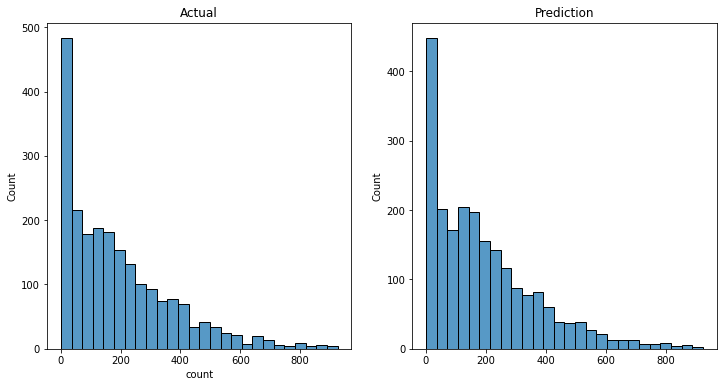

In [ ]:
# 실제 값과 예측 값 비교
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

sns.histplot(y_test, ax=axes[0])
sns.histplot(pred, ax=axes[1])

axes[0].set_title('Actual')
axes[1].set_title('Prediction')

plt.show()

## 튜닝

In [ ]:
%env LOKY_PICKLER='cloudpickle'

env: LOKY_PICKLER='cloudpickle'


In [ ]:
import multiprocessing

In [ ]:
multiprocessing.set_start_method('forkserver', force=True)

In [ ]:
from sklearn.utils import parallel_backend

In [ ]:
# Hyper Parameter 튜닝
params = {
    'n_estimators': [200, 300, 500], 
    'max_depth': [5, 10, None], 
    'random_state': [123],
}

from sklearn.model_selection import GridSearchCV

with parallel_backend('threading'):
    grid_search = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    grid_search.best_params_

In [ ]:
# 튜닝한 값 적용
rfc = RandomForestRegressor(**grid_search.best_params_)

rfc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

## 예측 (Predict)

In [ ]:
# test 데이터셋에 대한 예측
pred = rfc.predict(test[features])

# 검증코드 (아래 코드는 수정하지 않습니다.)
# Cell을 실행시 에러가 발생하면 안됩니다.
assert pred.shape[0] == 6493

## 제출

In [ ]:
# final_prediction 변수에 결과 값을 대입합니다.
final_prediction = pred

def make_submission(filename_prefix, pred):
    submission = pd.read_csv('data/sampleSubmission.csv')
    submission['count'] = pred
    timestring = datetime.datetime.now().strftime('%H-%M-%S')
    filename = '{}-{}.csv'.format(filename_prefix, timestring)
    submission.to_csv(filename, index=False)
    print('파일을 저장하였습니다. 파일명: {}'.format(filename))
    df = pd.read_csv(filename)
    return df

# 파일 저장
make_submission('V01-random-forest', final_prediction)

FileNotFoundError: ignored

제출 후 점수를 확인합니다.

[제출링크](https://www.kaggle.com/c/bike-sharing-demand/submit)

## Y Label 값 스케일 변환

정규 분포가 아닌 Y 값을 정규 분포로 만들어 성능 향상을 기대할 수 있습니다.

In [ ]:
print(f'log: {np.log(1)}')
print(f'log1p == log(x+1): {np.log1p(0)}')

log <==> exp 관계

In [ ]:
a = np.log(10)
print(f'log({10:.1f}) = {a:.4f}')
reverse_a = np.exp(a)
print(f'np.exp({a:.4f}) = {reverse_a:.1f}')

log1p <==> expm1 관계

In [ ]:
a = np.log1p(10)
print(f'log1p({10:.1f}) = {a:.4f}')
reverse_a = np.expm1(a)
print(f'np.expm1({a:.4f}) = {reverse_a:.1f}')

In [ ]:
# 분포 확인(histplot)
# count 컬럼
# train 데이터셋
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
sns.histplot(train['count'], ax=axes[0])
sns.histplot(np.log1p(train['count']), ax=axes[1])
plt.show()

In [ ]:
# 분포 확인(histplot)
# casual 컬럼
# train 데이터셋
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
sns.histplot(train['casual'], ax=axes[0])
sns.histplot(np.log1p(train['casual']), ax=axes[1])
plt.show()

In [ ]:
# 분포 확인(histplot)
# registered 컬럼
# train 데이터셋
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
sns.histplot(train['registered'], ax=axes[0])
sns.histplot(np.log1p(train['registered']), ax=axes[1])
plt.show()

In [ ]:
# casual, registered, count에 대하여 log1p 변환을 하고
# casual_log, registered_log, count_log 컬럼을 생성한 후 대입합니다.
# train 데이터셋 적용
train['casual_log'] = np.log1p(train['casual'])
train['registered_log'] = np.log1p(train['registered'])
train['count_log'] = train['casual_log'] + train['registered_log']

In [ ]:
# x에는 정의한 train[features], 
# y에는 'count_log', 
# random_state=123, test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(train[features], train['count_log'], test_size=0.2, random_state=123)

# 검증코드 (아래 코드는 수정하지 않습니다.)
# Cell을 실행시 에러가 발생하면 안됩니다.
assert x_train.shape[0] == 8708
assert x_test.shape[0] == 2178

In [ ]:
# RandomForestRegressor로 예측
# n_estimators=500, random_state=123
model = RandomForestRegressor(n_estimators=500, random_state=123)

model.fit(x_train, y_train)

In [ ]:
# test 데이터셋에 대한 예측
pred2 = rfc.predict(test[features])

# 검증코드 (아래 코드는 수정하지 않습니다.)
# Cell을 실행시 에러가 발생하면 안됩니다.
assert pred.shape[0] == 6493

In [ ]:
# 파일 저장
make_submission('V02-random-forest-log-scale', pred2)

제출 후 점수를 확인합니다.

[제출링크](https://www.kaggle.com/c/bike-sharing-demand/submit)

## Registered / Casual 나누어 예측 모델 생성

`count`는 `registered` + `casual` 입니다.

**총 대여량 = 등록된 회원 + 일반 회원 이 빌린 숫자의 합**입니다.

registered를 예측하는 모델 / causal을 예측하는 모델 2개를 만들어 각각 예측 후 합산된 결과를 도출합니다.

**요구사항**
- registered_log를 y값으로 예측하는 모델 생성
- casual_log를 y값으로 예측하는 모델 생성
- train_test_split(random_state=123, test_size=0.2)
- RandomForestRegressor 알고리즘 사용 (random_state=123, n_estimators=500)

**변수**
- `x_train`, `x_test`: feature 변수
- `y_train_reg`, `y_test_reg `: registered Y 변수
- `y_train_cas`, `y_test_cas `: casual Y 변수

In [ ]:
# x_train, x_test 변수 생성
# y_train_reg, y_test_reg 변수 생성
# train_test_split (random_state=123, test_size=0.2)활용
x_train, x_test, y_train_reg, y_test_reg = train_test_split(train[features], train['registered_log'], test_size=0.2, random_state=123)

In [ ]:
# y_train_cas와 y_test_cas 변수 생성
y_train_cas, y_test_cas = train.loc[y_train_reg.index, 'casual_log'], train.loc[y_test_reg.index, 'casual_log']

In [ ]:
# 검증코드 (아래 코드는 수정하지 않습니다.)
# Cell을 실행시 에러가 발생하면 안됩니다.
assert x_train.shape[0] == y_train_reg.shape[0] == y_train_cas.shape[0] == 8708

## 모델 정의

In [ ]:
# rfc_reg => RandomForestRegressor 를 생성, n_estimators=500, random_state=123
# y값: y_train_reg 변수로 설정
rfc_reg = RandomForestRegressor(n_estimators=500, random_state=123)

# 훈련(fit)
rfc_reg.fit(x_train, y_train_reg)

# 예측(predict)
y_pred_reg = rfc_reg.predict(x_test)
y_pred_reg = np.expm1(y_pred_reg)

# 검증 결과(RMSLE)
RMSLE(train.loc[y_test.index, 'registered'], y_pred_reg)

In [ ]:
# rfc_cas => RandomForestRegressor 를 생성, n_estimators=750, random_state=123
# y값: y_train_cas 변수로 설정
rfc_cas = RandomForestRegressor(n_estimators=750, random_state=123)

# 훈련(fit)
rfc_cas.fit(x_train, y_train_cas)

# 예측(predict)
y_pred_cas = rfc_cas.predict(x_test)
y_pred_cas = np.expm1(y_pred_cas)

# 검증 결과(RMSLE)
RMSLE(train.loc[y_test.index, 'casual'], y_pred_cas)

In [ ]:
# 결과를 합산 합니다.
# rfc_pred = y_pred_reg + y_pred_casual
rfc_pred = y_pred_reg + y_pred_cas

# 검증 결과(RMSLE)
RMSLE(train.loc[y_test.index, 'count'], rfc_pred)

## 예측 결과 확인

In [ ]:
# 실제 값(count)과 예측 값(pred)를 시각화하여 비교합니다.
# 비슷한 분포의 결과가 나오는지 확인합니다.
# histplot
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

sns.histplot(train.loc[y_test.index, 'count'], ax=axes[0])
sns.histplot(rfc_pred, ax=axes[1])

axes[0].set_title('Actual')
axes[1].set_title('Prediction')

plt.show()

## registered / casual 각각 예측

In [ ]:
# rfc1 모델로 예측
pred_reg = rfc_reg.predict(test[features])
pred_reg = np.expm1(pred_reg)

# rfc2 모델로 예측
pred_cas = rfc_cas.predict(test[features])
pred_cas = np.expm1(pred_cas)

# pred 변수에 결과를 합산합니다.
rfc_pred = pred_reg + pred_cas

In [ ]:
# test 데이터셋에 대하여 예측한 결과 분포도를 시각화
# histplot
plt.figure(figsize=(10, 6))
sns.histplot(rfc_pred)
plt.title('Prediction Distribution')
plt.show()

In [ ]:
# 파일 저장
make_submission('V03-random-forest-2models', rfc_pred)

제출 후 점수를 확인합니다.

[제출링크](https://www.kaggle.com/c/bike-sharing-demand/submit)

## 다른 알고리즘 사용

In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=750, 
                    learning_rate=0.025, 
                    max_depth=6, 
                    subsample=0.8, 
                    colsample_bytree=0.8, 
                    random_state=123, 
                    n_jobs=-1
                   )
xgb_reg.fit(x_train, y_train_reg)
y_pred_reg = xgb_reg.predict(x_test)
y_pred_reg = np.expm1(y_pred_reg)
RMSLE(train.loc[y_test_reg.index, 'registered'], y_pred_reg)

In [ ]:
xgb_cas = XGBRegressor(n_estimators=1000, 
                    learning_rate=0.025, 
                    max_depth=6, 
                    subsample=0.8, 
                    colsample_bytree=0.8, 
                    random_state=123, 
                    n_jobs=-1
                   )
xgb_cas.fit(x_train, y_train_cas)
y_pred_cas = xgb_cas.predict(x_test)
y_pred_cas = np.expm1(y_pred_cas)
RMSLE(train.loc[y_test_cas.index, 'casual'], y_pred_cas)

In [ ]:
y_pred = y_pred_cas + y_pred_reg
RMSLE(train.loc[y_test.index, 'count'], y_pred)

In [ ]:
pred_reg = xgb_reg.predict(test[features])
pred_reg = np.expm1(pred_reg)

pred_cas = xgb_cas.predict(test[features])
pred_cas = np.expm1(pred_cas)

xgb_pred = pred_reg + pred_cas

In [ ]:
make_submission('V04-xgb-2models', xgb_pred)

제출 후 점수를 확인합니다.

[제출링크](https://www.kaggle.com/c/bike-sharing-demand/submit)

## Windspeed

windspeed 가 0으로 표기 된 값들이 보입니다.

잘못 된 데이터일 가능성이 있으므로, 머신러닝 예측 후 windspeed가 0인 값들을 변경하고 다시 학습 데이터로 추가합니다.

In [ ]:
train['windspeed'].value_counts()

In [ ]:
# all_data 변수에 train, test를 합칩니다. 한 번에 전처리 해주기 위함입니다.
# sort=False로 섞이지 않도록 합니다.
all_data = pd.concat([train, test], sort=False)

In [ ]:
# windspeed = 0 인 데이터 개수
all_data.loc[all_data['windspeed'] == 0].shape[0]

In [ ]:
# windspeed = 0 이 아닌 데이터 개수
all_data.loc[all_data['windspeed'] != 0].shape[0]

In [ ]:
all_data.columns

In [ ]:
# windspeed의 예측에 사용할 feature를 정의 합니다.
wind_cols = [
    'season', 
    'holiday', 
    'workingday', 
    'weather', 
    'humidity',
    'windspeed', 
    'year', 
    'month', 
    'dayofweek', 
    'quarter', 
    'hour', 
    'temp_pca'
]

In [ ]:
# windspeed가 0이 아닌 데이터 (훈련용 데이터)
wind_train_x = all_data.loc[all_data['windspeed'] != 0, wind_cols]
wind_train_y = all_data.loc[all_data['windspeed'] != 0, 'windspeed']

# windspeed가 0인 데이터 (예측용 데이터)
wind_test_x = all_data.loc[all_data['windspeed'] == 0, wind_cols]
wind_test_y = all_data.loc[all_data['windspeed'] == 0, 'windspeed']

In [ ]:
# train_test_split
# test_size=0.2, random_state=123
x_train, x_test, y_train, y_test = train_test_split(wind_train_x, wind_train_y, test_size=0.2, random_state=123)

In [ ]:
# RandomForestRegressor로 예측합니다.
# n_estimators=350, max_depth=10 으로 설정합니다.
# random_state=123
rfc_wind = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=123)
rfc_wind.fit(x_train, y_train)
pred_wind = rfc_wind.predict(x_test)

# mean_squared_error 평가지표를 활용하여 결과를 확인합니다.
mean_squared_error(y_test, pred_wind)

In [ ]:
# windspeed가 0이었던 데이터들에 대하여 예측합니다.
pred_test_wind = rfc_wind.predict(wind_test_x)
pred_test_wind

In [ ]:
# 예측한 결과 값을 windspeed가 0 이었던 데이터에 대입합니다.
all_data.loc[all_data['windspeed'] == 0, 'windspeed'] = pred_test_wind

In [ ]:
# 다시 train, test를 분할합니다.
train = all_data[:len(train)]
test = all_data[len(train):]

In [ ]:
train.columns

In [ ]:
# feature를 선택합니다.
features = [
    # 사용하지 않을 feature는 주석 처리합니다.
    'season', 
    'holiday',
    'workingday', 
    'weather', 
    'humidity', 
    'windspeed',
    'year', 
    'month', 
#     'day', 
    'dayofweek', 
    'quarter', 
    'hour', 
    'temp_pca',
]

In [ ]:
# x_train, x_test 변수 생성
# y_train_reg, y_test_reg 변수 생성
# train_test_split (random_state=123, test_size=0.2)활용
x_train, x_test, y_train_reg, y_test_reg = train_test_split(train[features], train['registered_log'], test_size=0.2, random_state=123)

In [ ]:
# y_train_cas와 y_test_cas 변수 생성
y_train_cas, y_test_cas = train.loc[y_train_reg.index, 'casual_log'], train.loc[y_test_reg.index, 'casual_log']

In [ ]:
# XGBoost를 사용합니다. 이전 단계에서 생성한 모델과 유사합니다.
# 다만 feature의 개수가 달라졌으므로, hyper-parameter는 약간 조정합니다.
xgb_reg = XGBRegressor(n_estimators=1000, 
                    learning_rate=0.02, 
                    max_depth=6, 
                    subsample=0.7, 
                    colsample_bytree=0.8, 
                    random_state=123, 
                    n_jobs=-1
                   )
xgb_reg.fit(x_train, y_train_reg)

y_pred_reg = xgb_reg.predict(x_test)
y_pred_reg = np.expm1(y_pred_reg)
RMSLE(train.loc[y_test_reg.index, 'registered'], y_pred_reg)

In [ ]:
xgb_cas = XGBRegressor(n_estimators=1000, 
                    learning_rate=0.025, 
                    max_depth=6, 
                    subsample=0.8, 
                    colsample_bytree=0.8, 
                    random_state=123, 
                    n_jobs=-1
                   )
xgb_cas.fit(x_train, y_train_cas)
y_pred_cas = xgb_cas.predict(x_test)
y_pred_cas = np.expm1(y_pred_cas)
RMSLE(train.loc[y_test_reg.index, 'casual'], y_pred_cas)

In [ ]:
# 최종 결과에 대한 RMSLE loss를 산출합니다.
y_pred = y_pred_cas + y_pred_reg
RMSLE(train.loc[y_test_reg.index, 'count'], y_pred)

In [ ]:
# 최종 예측
pred_reg = xgb_reg.predict(test[features])
pred_reg = np.expm1(pred_reg)

pred_cas = xgb_cas.predict(test[features])
pred_cas = np.expm1(pred_cas)

xgb_pred = pred_reg + pred_cas

In [ ]:
# 결과를 파일로 저장합니다.
make_submission('V05-xgb-wind-2models', xgb_pred)

제출 후 점수를 확인합니다.

[제출링크](https://www.kaggle.com/c/bike-sharing-demand/submit)

## Feature Scaling

In [ ]:
# feature를 선택합니다.
features = [
    # 사용하지 않을 feature는 주석 처리합니다.
    'season', 
    'holiday',
    'workingday', 
    'weather', 
    'humidity', 
    'windspeed',
    'year', 
    'month', 
#     'day', 
    'dayofweek', 
    'quarter', 
    'hour', 
    'temp_pca',
]

In [ ]:
train[features]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
train[['humidity', 'windspeed', 'temp_pca']] = scaler.fit_transform(train[['humidity', 'windspeed', 'temp_pca']])
test[['humidity', 'windspeed', 'temp_pca']] = scaler.transform(test[['humidity', 'windspeed', 'temp_pca']])

In [ ]:
# x_train, x_test 변수 생성
# y_train_reg, y_test_reg 변수 생성
# train_test_split (random_state=123, test_size=0.2)활용
x_train, x_test, y_train_reg, y_test_reg = train_test_split(train[features], train['registered_log'], test_size=0.2, random_state=123)

In [ ]:
# y_train_cas와 y_test_cas 변수 생성
y_train_cas, y_test_cas = train.loc[y_train_reg.index, 'casual_log'], train.loc[y_test_reg.index, 'casual_log']

In [ ]:
# XGBoost를 사용합니다. 이전 단계에서 생성한 모델과 유사합니다.
# 다만 feature의 개수가 달라졌으므로, hyper-parameter는 약간 조정합니다.
xgb_reg = XGBRegressor(n_estimators=1000, 
                    learning_rate=0.02, 
                    max_depth=6, 
                    subsample=0.7, 
                    colsample_bytree=0.8, 
                    random_state=123, 
                    n_jobs=-1
                   )
xgb_reg.fit(x_train, y_train_reg)

y_pred_reg = xgb_reg.predict(x_test)
y_pred_reg = np.expm1(y_pred_reg)
RMSLE(train.loc[y_test_reg.index, 'registered'], y_pred_reg)

In [ ]:
xgb_cas = XGBRegressor(n_estimators=1000, 
                    learning_rate=0.025, 
                    max_depth=6, 
                    subsample=0.8, 
                    colsample_bytree=0.8, 
                    random_state=123, 
                    n_jobs=-1
                   )
xgb_cas.fit(x_train, y_train_cas)
y_pred_cas = xgb_cas.predict(x_test)
y_pred_cas = np.expm1(y_pred_cas)
RMSLE(train.loc[y_test_reg.index, 'casual'], y_pred_cas)

In [ ]:
# 최종 결과에 대한 RMSLE loss를 산출합니다.
y_pred = y_pred_cas + y_pred_reg
RMSLE(train.loc[y_test_reg.index, 'count'], y_pred)

In [ ]:
# 최종 예측
pred_reg = xgb_reg.predict(test[features])
pred_reg = np.expm1(pred_reg)

pred_cas = xgb_cas.predict(test[features])
pred_cas = np.expm1(pred_cas)

xgb_pred = pred_reg + pred_cas

In [ ]:
# 결과를 파일로 저장합니다.
make_submission('V06-xgb-std-scaler', xgb_pred)

## Hyperopt

In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [ ]:
reg_candidate = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10, 100]

space={'max_depth': hp.quniform("max_depth", 5, 15, 1),
       'gamma': hp.uniform ('gamma', 0, 1),
       'learning_rate': hp.quniform ('learning_rate', 0.01, 0.05, 0.005),
       'reg_alpha' : hp.choice('reg_alpha', reg_candidate),
       'reg_lambda' : hp.choice('reg_lambda', reg_candidate),
       'subsample': hp.quniform('subsample', 0.6, 1, 0.05),
       'colsample_bytree' : hp.quniform('colsample_bytree', 0.6, 1, 0.05),
       'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
       'n_estimators': hp.quniform('n_estimators', 200, 1500, 100)
      }

In [ ]:
# Regression: 
def hyperparameter_tuning(space):
    model=XGBRegressor(n_estimators =int(space['n_estimators']), 
                       max_depth = int(space['max_depth']), 
                       gamma = space['gamma'],
                       learning_rate = space['learning_rate'],
                       reg_alpha = space['reg_alpha'],
                       reg_lambda = space['reg_lambda'],
                       subsample = space['subsample'],
                       colsample_bytree = space['colsample_bytree'], 
                       min_child_weight = int(space['min_child_weight']),
                       random_state=123, 
                      )
    
    evaluation = [(x_train, y_train), (x_test, y_test)]
    
    model.fit(x_train, y_train,
              eval_set=evaluation, 
              eval_metric="rmse",
              early_stopping_rounds=20,
              verbose=0)

    pred = model.predict(x_test)
    pred = np.expm1(pred)
    rmsle= RMSLE(np.expm1(y_test), pred)    
    #change the metric if you like
    return {'loss':rmsle, 'status': STATUS_OK, 'model': model}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train[features], train['registered_log'], test_size=0.2, random_state=123)

In [ ]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

In [ ]:
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])
best['n_estimators'] = int(best['n_estimators'])
best['reg_alpha'] = reg_candidate[int(best['reg_alpha'])]
best['reg_lambda'] = reg_candidate[int(best['reg_lambda'])]
best['random_state'] = 123
print (best)

In [ ]:
x_train, x_test, y_train_reg, y_test_reg = train_test_split(train[features], train['registered_log'], test_size=0.2, random_state=123)

In [ ]:
# XGBoost를 사용합니다. 이전 단계에서 생성한 모델과 유사합니다.
# 다만 feature의 개수가 달라졌으므로, hyper-parameter는 약간 조정합니다.
xgb_reg = XGBRegressor(**best)
xgb_reg.fit(x_train, y_train_reg)

y_pred_reg = xgb_reg.predict(x_test)
y_pred_reg = np.expm1(y_pred_reg)

RMSLE(train.loc[y_test_reg.index, 'registered'], y_pred_reg)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train[features], train['casual_log'], test_size=0.2, random_state=123)

In [ ]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

In [ ]:
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])
best['n_estimators'] = int(best['n_estimators'])
best['random_state'] = 123
print (best)

In [ ]:
# y_train_cas와 y_test_cas 변수 생성
y_train_cas, y_test_cas = train.loc[y_train_reg.index, 'casual_log'], train.loc[y_test_reg.index, 'casual_log']

In [ ]:
xgb_cas = XGBRegressor(**best)
xgb_cas.fit(x_train, y_train_cas)
y_pred_cas = xgb_cas.predict(x_test)
y_pred_cas = np.expm1(y_pred_cas)
RMSLE(train.loc[y_test_reg.index, 'casual'], y_pred_cas)

In [ ]:
# 최종 결과에 대한 RMSLE loss를 산출합니다.
y_pred = y_pred_cas + y_pred_reg
RMSLE(train.loc[y_test_reg.index, 'count'], y_pred)

In [ ]:
# 최종 예측
pred_reg = xgb_reg.predict(test[features])
pred_reg = np.expm1(pred_reg)

pred_cas = xgb_cas.predict(test[features])
pred_cas = np.expm1(pred_cas)

xgb_pred = pred_reg + pred_cas

In [ ]:
# 결과를 파일로 저장합니다.
make_submission('V07-hyperopt-tuning', xgb_pred)

In [ ]:
sns.histplot(pycaret_pred)